
# Importing necessary libraries


In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting directories and image size

In [2]:
img_size =224

df_train = pd.read_csv('E:/Dataset/DRG/train.csv')
train_dir = 'E:/Dataset/DRG/train_images/'

# Reading training data 

In [3]:
training_Data = [] 

def create_training_Data():
    
    i=0 
    
    for img, label in zip(df_train['id_code'],df_train['diagnosis']):
        
        if((label==0) and (i>=1500)):
            continue
        elif(label==0):
            i+=1
        
        try:
            img_array = cv2.imread(f'{train_dir}{img}.png', cv2.IMREAD_COLOR) #reading as BGR for Transfer Learning
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) #Conversion of BGR to RGB

            new_array = cv2.resize(img_array, (img_size,img_size))
            training_Data.append([new_array, label])
       
        except Exception as e:
            pass 
        
    print(i)

In [4]:
create_training_Data()

1500


In [5]:
len(training_Data)

3357

### Converting data into numpy array


In [6]:
import random

random.shuffle(training_Data)

In [7]:
X = []
Y = []

for features,labels in training_Data:
    
    X.append(features)
    Y.append(labels)
    
X = np.array(X).reshape(-1,img_size,img_size,3)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

(3357, 224, 224, 3)
(3357,)


In [8]:
print("Size of the array: ",
      X.size)
 
print("Memory size of one array element in bytes: ",
      X.itemsize)
 
# memory size of numpy array
print("Memory size of numpy array in bytes:",
      X.size * X.itemsize)

Size of the array:  505322496
Memory size of one array element in bytes:  1
Memory size of numpy array in bytes: 505322496


In [9]:
unique, counts = np.unique(Y, return_counts=True)
LabelCounts = dict(zip(unique, counts))

for key, value in LabelCounts.items():
    if(key==0):
        print(key, '(No DR) : ', value)
    
    elif(key==1):
        print(key, '(Mild) : ', value)
    
    elif(key==2):
        print(key, '(Moderate) : ', value)
        
    elif(key==3):
        print(key, '(Severe) : ', value)
    
    else:
        print(key, '(Proliferative DR) : ', value)

0 (No DR) :  1500
1 (Mild) :  370
2 (Moderate) :  999
3 (Severe) :  193
4 (Proliferative DR) :  295


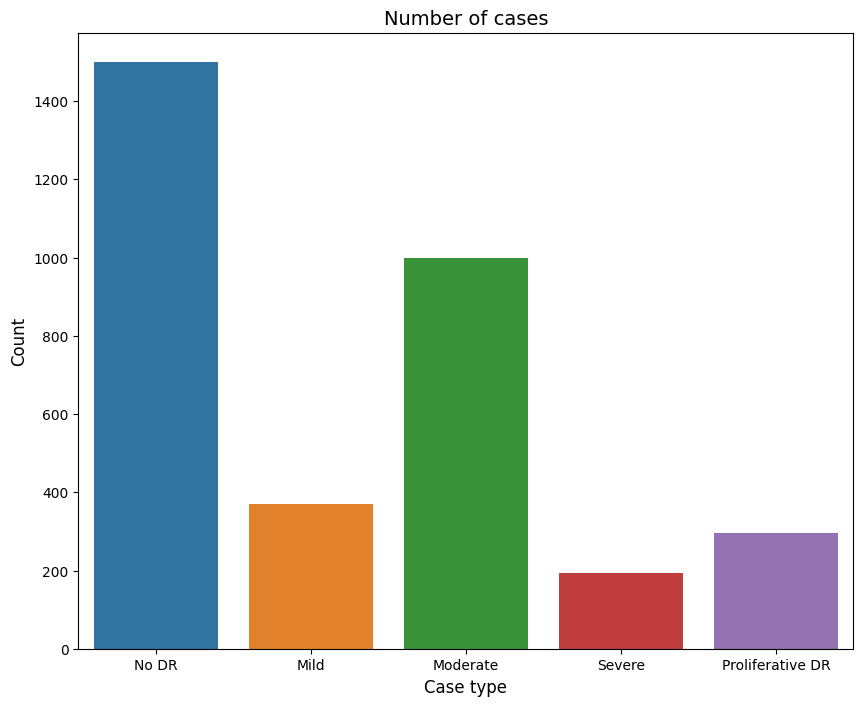

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x=unique, y= counts)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(unique)), ['No DR', 'Mild','Moderate','Severe', 'Proliferative DR' ])
plt.show()

### Normalization and Saving

In [11]:
#normalizing data

X = X/255.0

In [12]:
X.size

505322496

In [13]:
np.save('data2', X)
np.save('label2', Y)